In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visualization import map_feature, plot_data, plot_decision_boundary
import copy 
import math

%matplotlib inline

In [2]:
from act_cost_pred import sigmoid, compute_cost, predict
from gradient_descent import compute_gradient, gradient_descent


In [3]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :2]
    y = data[:, 2]
    return X, y

X_train, y_train = load_data("microchip_test_data.txt")

In [4]:
# print x_train
print("X_train : \n", X_train[:5])

# print y_train
print("y_train:", y_train[:5])

X_train : 
 [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
y_train: [1. 1. 1. 1. 1.]


In [5]:
print(X_train.shape)
print(y_train.shape)

(118, 2)
(118,)


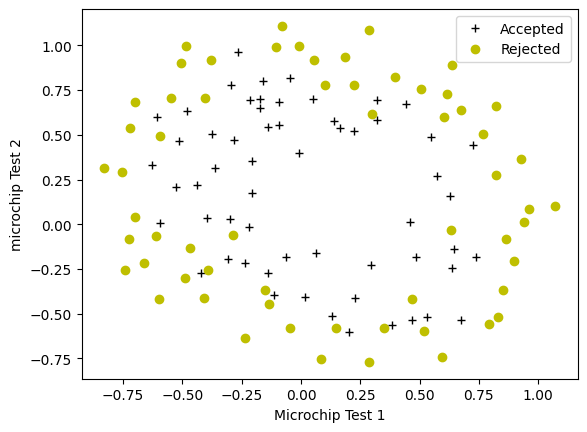

In [6]:
# visuailzing the data
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label = "Rejected")

# Set the y_axis label
plt.ylabel("microchip Test 2")

# Set the X_axis label
plt.xlabel('Microchip Test 1')
plt.legend(loc = "upper right")
plt.show()

In [7]:
print("Original shape of data:", X_train.shape)

# Creating a feature map to create more features of data
X_mapped =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)


NameError: name 'mapped_X' is not defined

In [ ]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", X_mapped[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [ ]:
from Regularized_cost_gradient import compute_cost_reg, compute_gradient_reg

# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 15000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0 : Cost     0.73 
Iteration 1500 : Cost     0.59 
Iteration 3000 : Cost     0.56 
Iteration 4500 : Cost     0.55 
Iteration 6000 : Cost     0.54 
Iteration 7500 : Cost     0.54 
Iteration 9000 : Cost     0.54 
Iteration 10500 : Cost     0.54 
Iteration 12000 : Cost     0.55 
Iteration 13500 : Cost     0.55 
Iteration 14999 : Cost     0.56 


In [ ]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390


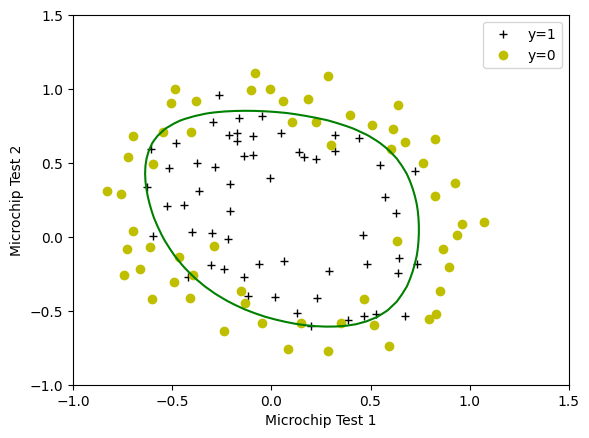

In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()